In [1]:
import pandas as pd
from sklearn import tree
from sklearn import feature_selection
from sklearn import linear_model
import graphviz
from IPython.display import display, Image

#### Load Dataset and Test Dataset

In [2]:
dataset = pd.read_csv(r'./titanic.csv')
test_dataset = pd.read_csv(r'./titanic_test.csv')
test_label_dataset = pd.read_csv(r'./titanic_testlabel.csv')

In [3]:
display(dataset)
display(test_dataset)
display(test_label_dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Data Preprocessing

In [4]:
train_data = dataset.loc[:,['Sex', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked']]
test_data = test_dataset.loc[:,['Sex', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked']]

In [5]:
train_data['Sex'].replace({'male': 0, 'female': 1}, inplace = True)
test_data['Sex'].replace({'male': 0, 'female': 1}, inplace = True)

In [6]:
train_data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace = True)
test_data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace = True)

In [7]:
train_data

,Sex,Age,Pclass,Fare,SibSp,Parch,Embarked
0,0,22.0,3,7.2500,1,0,0.0
1,1,38.0,1,71.2833,1,0,1.0
2,1,26.0,3,7.9250,0,0,0.0
3,1,35.0,1,53.1000,1,0,0.0
4,0,35.0,3,8.0500,0,0,0.0
...,...,...,...,...,...,...,...
886,0,27.0,2,13.0000,0,0,0.0
887,1,19.0,1,30.0000,0,0,0.0
888,1,NaN,3,23.4500,1,2,0.0
889,0,26.0,1,30.0000,0,0,1.0


In [8]:
train_data = train_data.fillna(train_data.mean())
test_data = test_data.dropna()

In [9]:
train_data.describe()

,Sex,Age,Pclass,Fare,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.352413,29.699118,2.308642,32.204208,0.523008,0.381594,0.362205
std,0.477990,13.002015,0.836071,49.693429,1.102743,0.806057,0.635442
min,0.000000,0.420000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,2.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,29.699118,3.000000,14.454200,0.000000,0.000000,0.000000
75%,1.000000,35.000000,3.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,3.000000,512.329200,8.000000,6.000000,2.000000


In [10]:
train_label = pd.concat([train_data, dataset['Survived']], axis = 1, join = "inner")['Survived']
test_label = pd.concat([test_data, test_label_dataset['Survived']], axis = 1, join = "inner")['Survived']

### Data Processing

#### Using Variance Threshold

In [11]:
model = feature_selection.VarianceThreshold(threshold=0.1)
model.fit(train_data)
features = model.get_support()

train_data_e1 = pd.DataFrame(model.transform(train_data), columns = train_data.columns.values[features])
test_data_e1 = pd.DataFrame(model.transform(test_data), columns = test_data.columns.values[features])

In [12]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_data_e1, train_label)
class_result = dtc.predict(test_data_e1)
acc = dtc.score(test_data_e1, test_label)
err = round((1 - acc) * 100, 2)

print("Used features : " + str(train_data_e1.columns))
print("Error Rate : " + str(err))

Used features : Index(['Sex', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked'], dtype='object')
Error Rate : 20.85


#### Using Select K Best

In [13]:
model = feature_selection.SelectKBest(feature_selection.chi2, k=3)
model.fit(train_data, train_label)
features = model.get_support()

train_data_e3 = pd.DataFrame(model.transform(train_data), columns = train_data.columns.values[features])
test_data_e3 = pd.DataFrame(model.transform(test_data), columns = test_data.columns.values[features])

In [14]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_data_e3, train_label)
class_result = dtc.predict(test_data_e3)
acc = dtc.score(test_data_e3, test_label)
err = round((1 - acc) * 100, 2)

print("Used features : " + str(train_data_e3.columns))
print("Error Rate : " + str(err))

Used features : Index(['Sex', 'Pclass', 'Fare'], dtype='object')
Error Rate : 12.99


#### Using Recursive Feature Elimination (RFE)

In [15]:
model = feature_selection.RFE(linear_model.LogisticRegression(solver='lbfgs', max_iter=200), n_features_to_select=3)
model.fit(train_data, train_label)
features = model.get_support()

train_data_e2 = pd.DataFrame(model.transform(train_data), columns = train_data.columns.values[features])
test_data_e2 = pd.DataFrame(model.transform(test_data), columns = test_data.columns.values[features])

In [16]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_data_e2, train_label)
class_result = dtc.predict(test_data_e2)
acc = dtc.score(test_data_e2, test_label)
err = round((1 - acc) * 100, 2)

print("Used features : " + str(train_data_e2.columns))
print("Error Rate : " + str(err))

Used features : Index(['Sex', 'Pclass', 'Embarked'], dtype='object')
Error Rate : 9.97


### Data Visualization

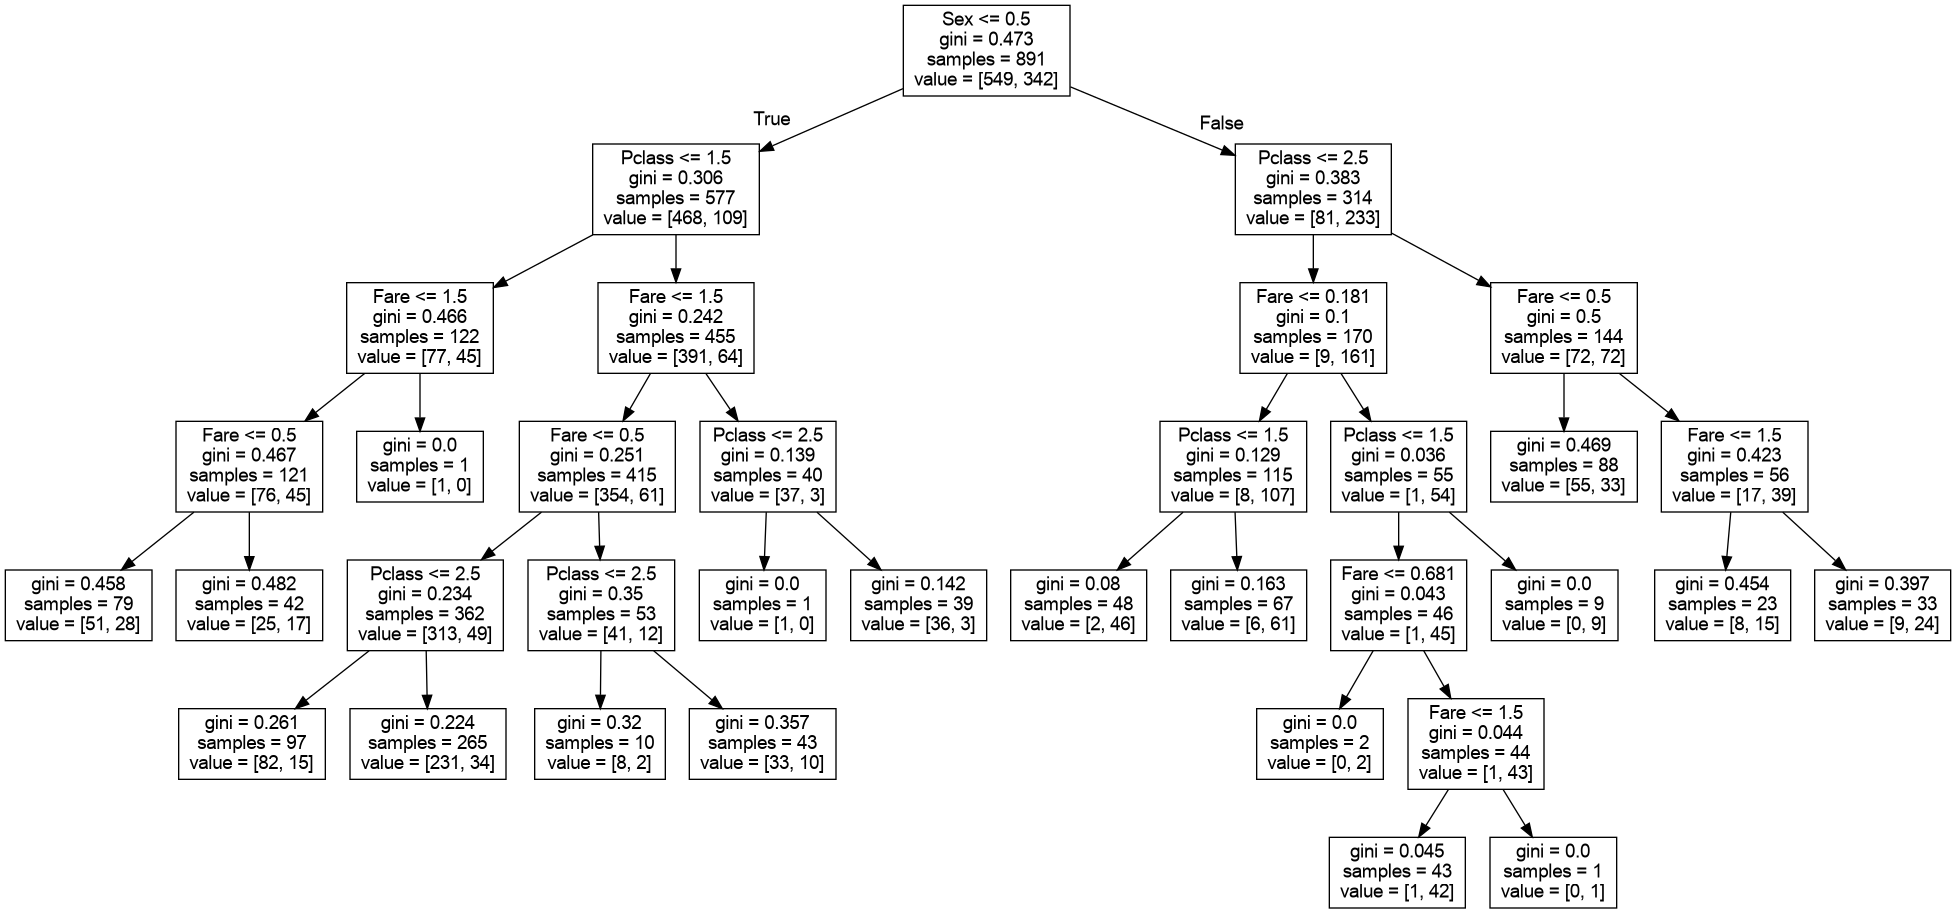

In [18]:
dot_data = tree.export_graphviz(dtc, out_file = None, feature_names = train_data_e3.columns.values)

graph = graphviz.Source(dot_data)
graph.format = 'png'
Image(graph.view(filename='digraph', directory='./'))